In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from mnist import MNIST

/home/azfar305/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%load_ext autoreload 
%matplotlib inline
%autoreload 2
from utilities import *

# Default figure size
plt.rcParams['figure.figsize'] = (10,7)

In [3]:
PATH = './data/fashion/'
data = MNIST(PATH)
data.gz = True
images,labels = data.load_training()

In [4]:
X_train = np.array(images).T
Y_train = np.array(labels)

In [5]:
classes = np.unique(Y_train)
C = classes.size; classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
description = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',
               4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',
               8:'Bag',9:'Ankle boot'}
description

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [7]:
pos = []
for val in classes:
    pos.append(np.where(Y_train == val)[0][0])

In [8]:
def plot_data(X,Y,description,num = 30,pos = None):
    
    if pos is None:
        pos = np.random.choice(Y.size,num,replace=False)
        width = 6
        height = math.ceil(num/width)
        fig = plt.figure(figsize=(width*1.8,height*1.8))
        for i in range(num):
            fig.add_subplot(height,width,i+1)
            img = X[:,pos[i]].reshape(28,28)
            plt.imshow(img,cmap='gray')
            if description is not None:
                plt.title(description[Y[pos[i]]])
            plt.axis('off')
        plt.subplots_adjust(hspace = 0.6)
        plt.show()
        
    else:
        if len(pos) > num:
            pos = np.random.choice(pos,num)
        width = min(math.ceil(len(pos)/2),6)
        height = math.ceil(len(pos)/width)
        fig = plt.figure(figsize=(width*1.8,height*1.8))
        for i,val in enumerate(pos):
            fig.add_subplot(height,width,i+1)
            img = X[:,val].reshape(28,28)
            plt.imshow(img,cmap='gray')
            if description is not None:
                plt.title(description[Y[val]])
            plt.axis('off')
        plt.subplots_adjust(hspace = 0.6)
        plt.show()
        

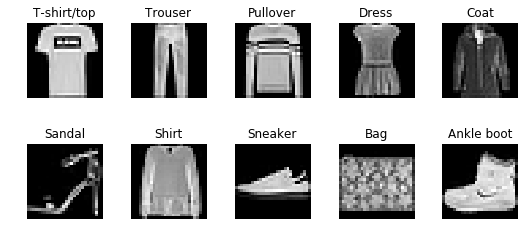

In [9]:
plot_data(X_train,Y_train,description,pos = pos)

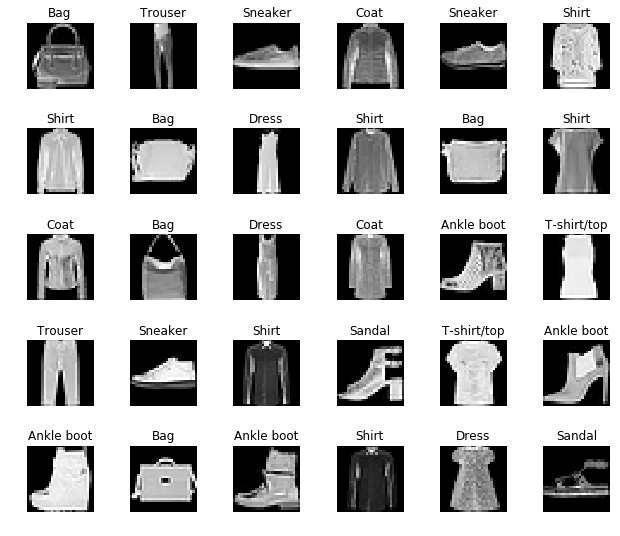

In [10]:
plot_data(X_train,Y_train,description)

Keys:  [0, 6, 2, 4]


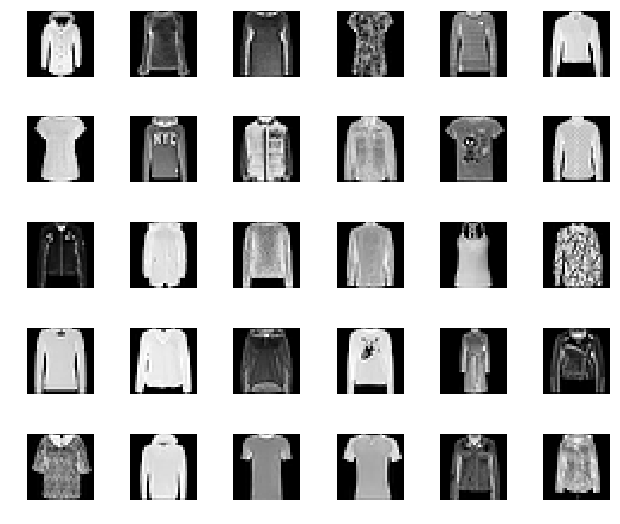

In [11]:
# Impossible to distinguish between T-shirt,Shirt,Pullover,Coat
indices = []
indices.append(list(description.values()).index('T-shirt/top'))
indices.append(list(description.values()).index('Shirt'))
indices.append(list(description.values()).index('Pullover'))
indices.append(list(description.values()).index('Coat'))
print('Keys: ',indices)
val = np.where(np.isin(Y_train,indices) == True)[0]
plot_data(X_train,Y_train,description=None,num=30,pos=val)

In [12]:
def horizontal_flip(X):
    
    flip_X = X.T.reshape(-1,28,28)
    flip_X = flip_X[:,:,::-1]
    flip_X = flip_X.reshape(-1,28*28)
    return flip_X.T

In [13]:
flip_X = horizontal_flip(X_train)

In [14]:
flip_X.shape

(784, 60000)

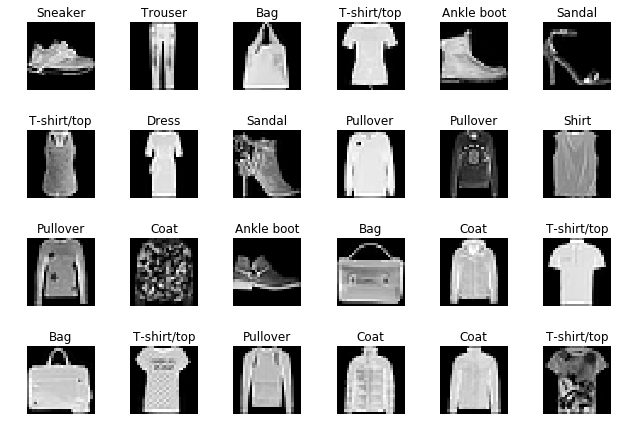

In [15]:
plot_data(flip_X,Y_train,description,num=24)

In [16]:
X_train = np.c_[X_train,flip_X]

X_train.shape

(784, 120000)

In [17]:
Y_train = np.append(Y_train,Y_train)

Y_train.shape

(120000,)

In [18]:
X_train = X_train/255

Yhot_train = one_hot_matrix(Y_train,C)

In [19]:
Yhot_train.shape

(10, 120000)

In [20]:
# Loading test set
# Performing the same preprocessing on the test set 
images,labels = data.load_testing()
X_test = np.array(images).T/255
Y_test = np.array(labels)

In [21]:
X_test.shape,Y_test.shape

((784, 10000), (10000,))

In [22]:
# Sanity checking params_initialization
tf.reset_default_graph()
layers = [X_train.shape[0],25,12,C]
params = params_initialization(layers,0.0)
print("W1 = " + str(params["W1"]))
print("b1 = " + str(params["b1"]))
print("W2 = " + str(params["W2"]))
print("b2 = " + str(params["b2"]))
print("W3 = " + str(params["W3"]))
print("b3 = " + str(params["b3"]))

INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
W1 = <tf.Variable 'W1:0' shape=(25, 784) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>
W3 = <tf.Variable 'W3:0' shape=(10, 12) dtype=float32_ref>
b3 = <tf.Variable 'b3:0' shape=(10, 1) dtype=float32_ref>


In [23]:
# Sanity checking forward propagation
tf.reset_default_graph()
X = tf.placeholder(tf.float32,shape=(X_train.shape),name='X')
with tf.Session() as sess:
    params = params_initialization(layers,0.0)
    ZL = forward_propagation(X,params)
    print ("ZL = "+str(ZL))    

INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
ZL = Tensor("add_2:0", shape=(10, 120000), dtype=float32)


In [24]:
def lr_steps(start,scale,step):
    lr = start * scale**tf.to_float(step)
    return lr

In [55]:
def lr_finder(X_train,Y_train,layer_dims,batch_size=256
              ,num_epocs=1,start = 1e-6,scale=1.03):
    
    ops.reset_default_graph()
    #print(X_train.shape)
    hist_cost = []
    hist_alpha = []
    
    assert(X_train.shape[1] == Y_train.shape[1])
    Xall = tf.placeholder(tf.float32,shape=X_train.T.shape,name='X_train')
    Yall = tf.placeholder(tf.float32,shape=Y_train.T.shape,name='Yhot_train')
    
    ds = tf.data.Dataset.from_tensor_slices((Xall,Yall))
    ds = ds.shuffle(buffer_size=Xall.shape[0])
    ds = ds.batch(batch_size=batch_size).repeat(num_epocs)
    #print('batch_size: ',batch_size)
    #print(ds.output_shapes)
    iterator = ds.make_initializable_iterator()
    X,Y = iterator.get_next()
    #print(batch)
    X=tf.transpose(X); Y=tf.transpose(Y)
    params = params_initialization(layer_dims,lamb=0.0)
    
    ZL = forward_propagation(X,params)
    cost = costFunction(ZL,Y,reg_term=0)
    num_batches = np.ceil(X_train.shape[1]/batch_size)
    #print("Number of Expected batches:",num_batches)
    step = tf.Variable(0,trainable=False)
    alpha = lr_steps(start,scale,step)
    
    optimizer = tf.train.AdamOptimizer(learning_rate=alpha).minimize(cost,global_step=step)
    init = tf.global_variables_initializer()
    smallest = np.inf
    with tf.Session() as sess:
        sess.run(init)
        sess.run(iterator.initializer,feed_dict={Xall:X_train.T,
                                                Yall:Y_train.T})
        while True:
            try:
                _,batch_cost,a = sess.run([optimizer,cost,alpha])
                if batch_cost > 5*smallest:
                    break
                hist_cost.append(batch_cost)
                hist_alpha.append(a)
                smallest = min(smallest,batch_cost)
            except tf.errors.OutOfRangeError:
                break

    #print('Actual Batches: ',ss)
    #print("Minimum: ", smallest)
    return hist_alpha,hist_cost
            

In [56]:
layer_dims = [X_train.shape[0],40,20,C]

In [57]:
X_train.shape

(784, 120000)

In [58]:
Yhot_train.shape

(10, 120000)

In [59]:
%%time
alpha,cost = lr_finder(X_train,Yhot_train,layer_dims,num_epocs=2)

INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
CPU times: user 2.92 s, sys: 1.31 s, total: 4.23 s
Wall time: 9.69 s


In [60]:
len(cost),len(alpha)

(425, 425)

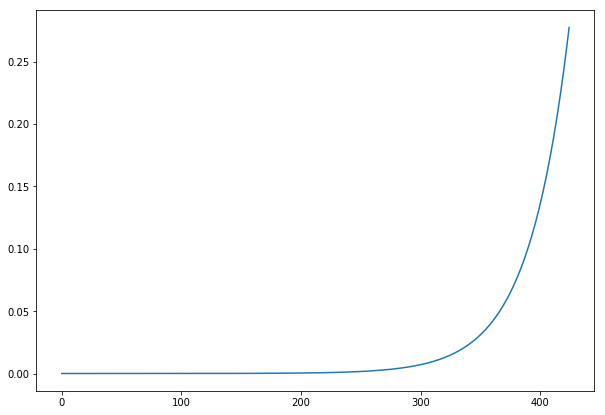

In [62]:
plt.plot(alpha)

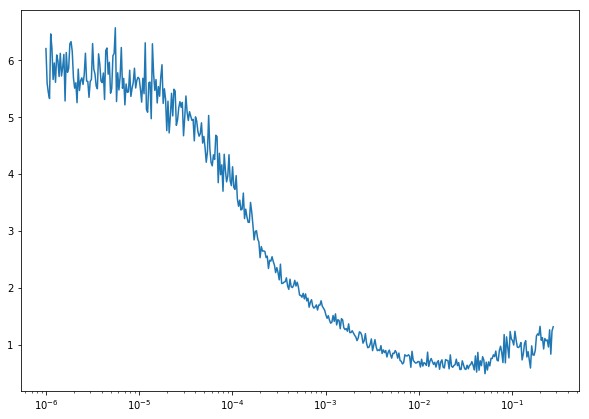

In [63]:
plt.semilogx(alpha,cost)